# **Grey GM (1,1) Model**

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

Import the dataset

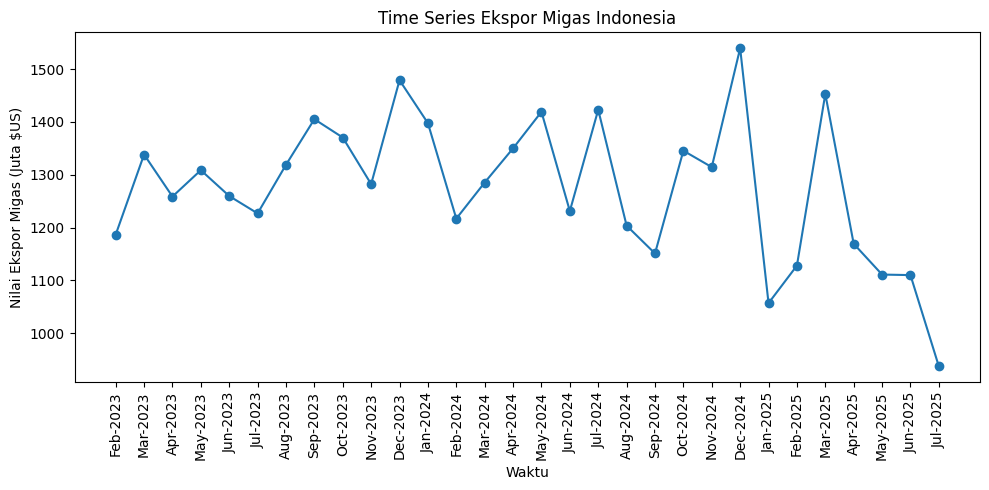

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

# Membaca data
df = pd.read_csv("/content/Data Ekspor Migas Grey-Markov.csv")

# Buat kolom datetime dengan rentang mulai Feb 2023
start_date = pd.to_datetime("2023-02-01")
df['Tanggal'] = [start_date + relativedelta(months=i) for i in range(len(df))]

# Format menjadi Bulan-Tahun (contoh: Feb-2023)
df['Tanggal'] = df['Tanggal'].dt.strftime('%b-%Y')

# Ambil kolom waktu (format Bulan-Tahun) dan nilai ekspor
waktu = df['Tanggal']
nilai_ekspor = df.iloc[:, 1]  # kolom kedua (Nilai Ekspor Migas)

# Plot grafik time series
plt.figure(figsize=(10, 5))
plt.plot(waktu, nilai_ekspor, marker='o')
plt.title("Time Series Ekspor Migas Indonesia")
plt.xlabel("Waktu")
plt.ylabel("Nilai Ekspor Migas (Juta $US)")
plt.xticks(rotation=90)  # rotasi 90 derajat agar tidak terlalu rapat
plt.tight_layout()
plt.show()

In [ ]:
x0 = df.iloc[:, 1]

In [ ]:
def ago(lis):
    total = 0
    for x in lis:
        total += x
        yield total


x1 = list(ago(x0))

In [ ]:
def mgo(lis):
  pre = lis[0]
  for x in lis:
      mgoVal = (pre + x)/2
      pre = x
      yield mgoVal

z1 = [x * -1 for x in list(mgo(x1))]

z1 = np.delete(z1 ,0)

In [ ]:
B = pd.DataFrame({'0':z1})
B['1']  = 1

B_ = B.to_numpy()
B_t = B.transpose().to_numpy()

In [ ]:
E1_pre = B_t.dot(B_)

E1 = np.linalg.inv(E1_pre)

In [ ]:
Xn = np.delete(x0 ,0)

In [ ]:
E2 = B_t.dot(Xn)

In [ ]:
parameter = E1.dot(E2)

a = parameter.item(0)
b = parameter.item(1)

print(a)
print(b)

0.004932419377955167
1378.5375703832772


The time response sequence

In [ ]:
def dif_eq(k):
  return (x0[1] - (b/a)) * math.exp(-1*a*(k-1)) + (b/a)

Compare the real value with the forcaste value

In [ ]:
K = len(x0) - 1
X_forecast = dif_eq(K) - dif_eq(K-1)

print(x0[K])
print(X_forecast)

937.31
1197.9155296888493


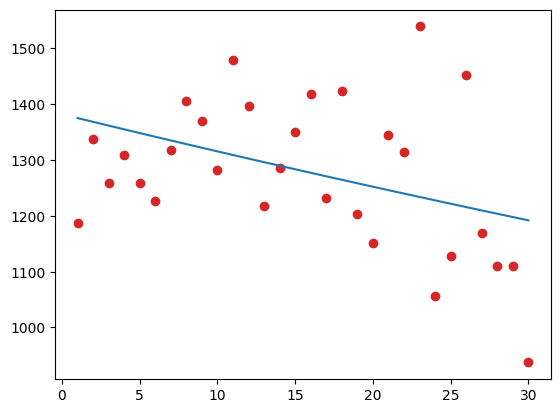

In [ ]:
x_range = np.arange(1,x0.size+1)

def x_forecast(lis):
  for x in lis:
    x_fcst =  dif_eq(x) - dif_eq(x-1)
    yield x_fcst

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_range, list(x_forecast(x_range)), color='tab:blue')
ax.scatter(x_range, x0, color='tab:red')

In [ ]:
# Membentuk DataFrame baru sesuai permintaan

# Ambil kolom waktu (kolom pertama)
waktu = df.iloc[:, 0]

# Ambil kolom nilai ekspor migas (kolom kedua)
nilai_ekspor = df.iloc[:, 1]

# AGO (X(1)) → sudah dihitung sebelumnya sebagai x1
X1 = pd.Series(x1, name='X(1)')

# MGO (Z(1)) → sudah dihitung sebelumnya sebagai z1
Z1 = pd.Series(z1, name='Z(1)')

# Membentuk DataFrame baru
df_new = pd.DataFrame({
    'Waktu': waktu,
    'Nilai Ekspor Migas (Juta Rupiah)': nilai_ekspor,
    'X(1)': X1,
    'Z(1)': Z1
})

# Simpan ke CSV
df_new.to_csv('/content/Hasil_Transformasi_Grey_Markov.csv', index=False)

# Tampilkan keseluruhan DataFrame
display(df_new)

,Waktu,Nilai Ekspor Migas (Juta Rupiah),X(1),Z(1)
0,Feb-2023,1186.51,1186.51,-1855.625
1,Mar-2023,1338.23,2524.74,-3154.070
2,Apr-2023,1258.66,3783.40,-4437.705
3,May-2023,1308.61,5092.01,-5721.855
4,Jun-2023,1259.69,6351.70,-6965.100
5,Jul-2023,1226.80,7578.50,-8237.895
6,Aug-2023,1318.79,8897.29,-9599.840
7,Sep-2023,1405.10,10302.39,-10987.605
8,Oct-2023,1370.43,11672.82,-12313.920
9,Nov-2023,1282.20,12955.02,-13694.490


**Error Relatif**

In [ ]:
x_hat = list(x_forecast(x_range))  # hasil prediksi GM(1,1)
error_rel = ((x0 - x_hat) / x0) * 100
error_rel = np.array(error_rel)

Tentukan jumlah keadaan (state)

In [ ]:
n = len(error_rel)
r = int(1 + 3.3 * np.log10(n))   # banyak state
print("Jumlah state (r):", r)

Jumlah state (r): 5


In [ ]:
# Tentukan interval setiap state
L = np.min(error_rel)
H = np.max(error_rel)

# Hitung batas interval setiap state sesuai formula slide
intervals = []
for j in range(1, r+1):
    lower = L + (j-1)/r * (H - L)   # er(j−)
    upper = L + j/r * (H - L)       # er(j+)
    intervals.append([lower, upper])

intervals = np.array(intervals)
print("Interval tiap state:\n", intervals)

Interval tiap state:
 [[-27.17472937 -17.77035406]
 [-17.77035406  -8.36597875]
 [ -8.36597875   1.03839656]
 [  1.03839656  10.44277187]
 [ 10.44277187  19.84714718]]


In [ ]:
# Tentukan state masing-masing data error
state = []
for e in error_rel:
    for j in range(len(intervals)):
        low, high = intervals[j]
        if low <= e <= high:
            state.append(j+1)   # +1 agar state dimulai dari 1
            break

In [ ]:
result_df = pd.DataFrame({
    'Data Asli': x0.values,
    'Prediksi GM(1,1)': x_hat,
    'Error Relatif (%)': error_rel,
    'State': state
})

result_df

,Data Asli,"Prediksi GM(1,1)",Error Relatif (%),State
0,1186.51,1375.325913,-15.913554,2
1,1338.23,1368.558931,-2.266347,3
2,1258.66,1361.825245,-8.196435,3
3,1308.61,1355.124690,-3.554511,3
4,1259.69,1348.457104,-7.046742,3
5,1226.80,1341.822324,-9.375801,2
6,1318.79,1335.220189,-1.245853,3
7,1405.10,1328.650539,5.440856,4
8,1370.43,1322.113213,3.525666,4
9,1282.20,1315.608052,-2.605526,3


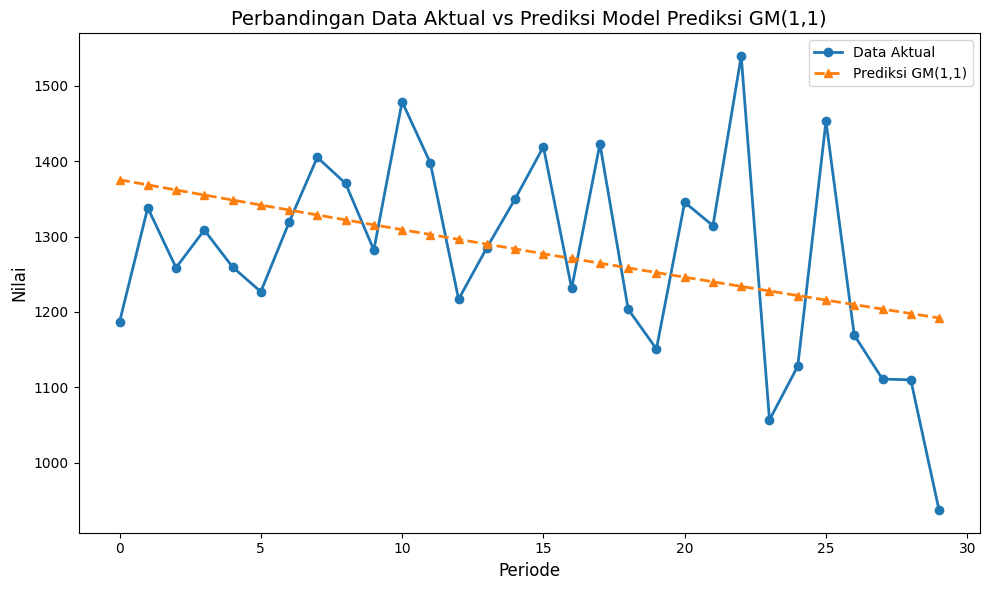

In [ ]:
import matplotlib.pyplot as plt

# Pastikan hanya data yang valid (tidak NaN)
data_valid_gm = result_df.dropna(subset=["Data Asli", "Prediksi GM(1,1)"])

# Buat grafik time series perbandingan Data Asli vs Prediksi Grey(1,1)
plt.figure(figsize=(10, 6))
plt.plot(data_valid_gm.index, data_valid_gm["Data Asli"], label="Data Aktual", marker='o', linestyle='-', linewidth=2)
plt.plot(data_valid_gm.index, data_valid_gm["Prediksi GM(1,1)"], label="Prediksi GM(1,1)", marker='^', linestyle='--', linewidth=2)

# Tambahkan judul dan label
plt.title("Perbandingan Data Aktual vs Prediksi Model Prediksi GM(1,1)", fontsize=14)
plt.xlabel("Periode", fontsize=12)
plt.ylabel("Nilai", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
result2_df = pd.DataFrame({
    'Waktu': waktu,
    'Data Asli': x0.values,
    'Prediksi GM(1,1)': x_hat,
})

result2_df

result2_df.to_csv('/content/Hasil_Prediksi_GM(1,1).csv', index=False)

# **MARKOV CHAIN**

In [ ]:
# Bentuk Matriks Peluang Transisi Markov
# 1. Matriks Frekuensi Transisi n_ij
freq_matrix = np.zeros((r, r))

for i in range(len(state)-1):
    i_state = state[i] - 1       # state asal (index)
    j_state = state[i+1] - 1     # state tujuan (index)
    freq_matrix[i_state, j_state] += 1

freq_df = pd.DataFrame(freq_matrix,
                       columns=[f"Keadaan {j+1}" for j in range(r)],
                       index=[f"Keadaan {i+1}" for i in range(r)])

print("\nMatriks Frekuensi Transisi n_ij:\n")
display(freq_df)

# 2. Matriks Peluang Transisi P_ij
# Membentuk matriks peluang transisi
transition_matrix = np.zeros_like(freq_matrix)

for i in range(r):
    row_sum = freq_matrix[i].sum()
    if row_sum == 0:
        # Jika state tidak memiliki transisi keluar → state tetap
        transition_matrix[i, i] = 1
    else:
        transition_matrix[i] = freq_matrix[i] / row_sum

P_df = pd.DataFrame(transition_matrix,
                    columns=[f"Keadaan {j+1}" for j in range(r)],
                    index=[f"Keadaan {i+1}" for i in range(r)])

print("\nMatriks Peluang Transisi (P_ij):\n")
display(P_df)

# 3. Membentuk P(k) = P^k untuk k = 1 sampai jumlah transisi (n-1)
P_k = {}
num_transition_steps = len(state)-1  # = n-1 langkah

for k in range(1, num_transition_steps+1):
    P_k[f"P({k})"] = np.linalg.matrix_power(transition_matrix, k)

# Menampilkan P(1) sampai P(4)
for k in range(1, 5):
    print(f"\nP({k}):")
    display(pd.DataFrame(P_k[f"P({k})"],
                         columns=[f"Keadaan {j+1}" for j in range(r)],
                         index=[f"Keadaan {i+1}" for i in range(r)]))

# Menampilkan P(28) sampai P(29) jika tersedia
for k in range(28, 30):
    if k <= num_transition_steps:
        print(f"\nP({k}):")
        display(pd.DataFrame(P_k[f"P({k})"],
                             columns=[f"Keadaan {j+1}" for j in range(r)],
                             index=[f"Keadaan {i+1}" for i in range(r)]))


Matriks Frekuensi Transisi n_ij:



,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
Keadaan 1,0.0,0.0,0.0,0.0,0.0
Keadaan 2,0.0,0.0,3.0,1.0,0.0
Keadaan 3,1.0,2.0,6.0,2.0,3.0
Keadaan 4,0.0,0.0,3.0,3.0,1.0
Keadaan 5,0.0,1.0,2.0,1.0,0.0



Matriks Peluang Transisi (P_ij):



,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
Keadaan 1,1.000000,0.000000,0.000000,0.000000,0.000000
Keadaan 2,0.000000,0.000000,0.750000,0.250000,0.000000
Keadaan 3,0.071429,0.142857,0.428571,0.142857,0.214286
Keadaan 4,0.000000,0.000000,0.428571,0.428571,0.142857
Keadaan 5,0.000000,0.250000,0.500000,0.250000,0.000000



P(1):


,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
Keadaan 1,1.000000,0.000000,0.000000,0.000000,0.000000
Keadaan 2,0.000000,0.000000,0.750000,0.250000,0.000000
Keadaan 3,0.071429,0.142857,0.428571,0.142857,0.214286
Keadaan 4,0.000000,0.000000,0.428571,0.428571,0.142857
Keadaan 5,0.000000,0.250000,0.500000,0.250000,0.000000



P(2):


,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
Keadaan 1,1.000000,0.000000,0.000000,0.000000,0.000000
Keadaan 2,0.053571,0.107143,0.428571,0.214286,0.196429
Keadaan 3,0.102041,0.114796,0.459184,0.211735,0.112245
Keadaan 4,0.030612,0.096939,0.438776,0.280612,0.153061
Keadaan 5,0.035714,0.071429,0.508929,0.241071,0.142857



P(3):


,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
Keadaan 1,1.000000,0.000000,0.000000,0.000000,0.000000
Keadaan 2,0.084184,0.110332,0.454082,0.228954,0.122449
Keadaan 3,0.134840,0.093659,0.429756,0.213101,0.128644
Keadaan 4,0.061953,0.100948,0.457544,0.245445,0.134111
Keadaan 5,0.072066,0.108418,0.446429,0.229592,0.143495



P(4):


,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
Keadaan 1,1.000000,0.000000,0.000000,0.000000,0.000000
Keadaan 2,0.116618,0.095481,0.436703,0.221187,0.130011
Keadaan 3,0.165536,0.093555,0.410077,0.208299,0.122534
Keadaan 4,0.094635,0.098891,0.444047,0.229319,0.133109
Keadaan 5,0.103954,0.099649,0.442784,0.225150,0.128462



P(28):


,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
Keadaan 1,1.000000,0.000000,0.000000,0.000000,0.000000
Keadaan 2,0.625661,0.041464,0.184143,0.093928,0.054803
Keadaan 3,0.646341,0.039173,0.173971,0.088739,0.051776
Keadaan 4,0.616234,0.042508,0.188781,0.096294,0.056183
Keadaan 5,0.620303,0.042057,0.186779,0.095273,0.055588



P(29):


,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
Keadaan 1,1.000000,0.000000,0.000000,0.000000,0.000000
Keadaan 2,0.638814,0.040007,0.177673,0.090628,0.052878
Keadaan 3,0.658767,0.037797,0.167858,0.085621,0.049956
Keadaan 4,0.629718,0.041015,0.182148,0.092910,0.054209
Keadaan 5,0.633644,0.040580,0.180216,0.091925,0.053635


In [ ]:
# Ambil nama waktu (bulan/tanggal) dari kolom pertama data
waktu = df.iloc[:,0].values  # ini otomatis mengikuti data kamu

# ----- Membangun Tabel Prediksi Keadaan -----
rows = []

for i in range(len(state)-1):
    k_awal = state[i]
    k_akhir = state[i+1]

    row = {
        "Waktu": waktu[i+1],
        "Keadaan Awal": k_awal,
        "Transisi Ke": k_akhir
    }

    # Ambil peluang transisi dari matriks P
    probs = transition_matrix[k_awal - 1]

    for j in range(r):
        row[f"Keadaan {j+1}"] = round(probs[j], 2)

    rows.append(row)

prediksi_keadaan_df = pd.DataFrame(rows)

# ----- Tambahkan Baris Jumlah di bawah -----
jumlah_row = {"Waktu": "Jumlah", "Keadaan Awal": "", "Transisi Ke": ""}
for j in range(r):
    jumlah_row[f"Keadaan {j+1}"] = round(prediksi_keadaan_df[f"Keadaan {j+1}"].sum(), 2)

prediksi_keadaan_df.loc[len(prediksi_keadaan_df)] = jumlah_row

# ----- Tampilkan hasil -----
print("\nTabel Prediksi Keadaan Model Grey–Markov:\n")
display(prediksi_keadaan_df)

# Ambil baris "Jumlah" (baris terakhir tabel)
jumlah_values = prediksi_keadaan_df.iloc[-1, 3:]

# Cari indeks keadaan dengan nilai terbesar
predicted_state = jumlah_values.idxmax()
predicted_state_number = int(predicted_state.split()[-1])

print("\nPrediksi Keadaan Berikutnya:", predicted_state_number)


Tabel Prediksi Keadaan Model Grey–Markov:



,Waktu,Keadaan Awal,Transisi Ke,Keadaan 1,Keadaan 2,Keadaan 3,Keadaan 4,Keadaan 5
0,Mar-2023,2,3,0.00,0.00,0.75,0.25,0.00
1,Apr-2023,3,3,0.07,0.14,0.43,0.14,0.21
2,May-2023,3,3,0.07,0.14,0.43,0.14,0.21
3,Jun-2023,3,3,0.07,0.14,0.43,0.14,0.21
4,Jul-2023,3,2,0.07,0.14,0.43,0.14,0.21
5,Aug-2023,2,3,0.00,0.00,0.75,0.25,0.00
6,Sep-2023,3,4,0.07,0.14,0.43,0.14,0.21
7,Oct-2023,4,4,0.00,0.00,0.43,0.43,0.14
8,Nov-2023,4,3,0.00,0.00,0.43,0.43,0.14
9,Dec-2023,3,5,0.07,0.14,0.43,0.14,0.21



Prediksi Keadaan Berikutnya: 3


In [ ]:
# Simpan tabel hasil prediksi ke file CSV
output_path = "Tabel_Prediksi_Keadaan_Grey-Markov.csv"
prediksi_keadaan_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"Tabel prediksi keadaan berhasil disimpan sebagai: {output_path}")

Tabel prediksi keadaan berhasil disimpan sebagai: Tabel_Prediksi_Keadaan_Grey-Markov.csv


In [ ]:
# MENGHITUNG NILAI PREDIKSI MODEL GREY-MARKOV (1,1)

# 1. Ambil prediksi GM(1,1) untuk periode berikutnya
x_gm_next = X_forecast

# 2. Ambil batas interval state hasil prediksi Markov
lower_bound, upper_bound = intervals[predicted_state_number - 1]

# 3. Hitung nilai koreksi berdasarkan error interval
correction_factor = (lower_bound + upper_bound) / 2 / 100

# 4. Hitung prediksi model Grey-Markov(1,1)
x_gm_markov_next = x_gm_next * (1 + correction_factor)

print(f"Prediksi GM(1,1) tanpa koreksi : {x_gm_next:,.3f}")
print(f"State Prediksi Markov : {predicted_state_number}")
print(f"Interval Error State : ({lower_bound:.6f} , {upper_bound:.6f})")
print(f"Faktor Koreksi ( (er- + er+) / 2 / 100 ) : {correction_factor:.6f}")
print(f"\n>> Prediksi Akhir Grey–Markov(1,1) : {x_gm_markov_next:,.3f}\n")

Prediksi GM(1,1) tanpa koreksi : 1,197.916
State Prediksi Markov : 3
Interval Error State : (-8.365979 , 1.038397)
Faktor Koreksi ( (er- + er+) / 2 / 100 ) : -0.036638

>> Prediksi Akhir Grey–Markov(1,1) : 1,154.026



In [ ]:
# Tambahkan satu baris prediksi periode berikutnya ke tabel

next_time = "Prediksi Periode Berikutnya"
tabel_akhir = pd.DataFrame({
    'Waktu': waktu,
    'Data Asli': x0.values,
    'Grey(1,1)': x_hat,
    'State Markov': state
})

def correction(state):
    lb, ub = intervals[state - 1]
    return (lb + ub) / 2 / 100  # (er- + er+) / 2 / 100

# Hitung Grey–Markov for historical periods
tabel_akhir["Grey-Markov(1,1)"] = tabel_akhir.apply(
    lambda row: row["Grey(1,1)"] * (1 + correction(int(row["State Markov"])))
                if pd.notnull(row["Grey(1,1)"]) and pd.notnull(row["State Markov"])
                else np.nan,
    axis=1
)


new_row = {
    "Waktu": next_time,
    "Data Asli": np.nan,
    "Grey(1,1)": x_gm_next,
    "State Markov": predicted_state_number,
    "Grey-Markov(1,1)": x_gm_markov_next
}

tabel_akhir = pd.concat([tabel_akhir, pd.DataFrame([new_row])], ignore_index=True)

print("\nTabel Akhir Model Grey–Markov(1,1) dengan Prediksi ke Depan:\n")
display(tabel_akhir)


Tabel Akhir Model Grey–Markov(1,1) dengan Prediksi ke Depan:



,Waktu,Data Asli,"Grey(1,1)",State Markov,"Grey-Markov(1,1)"
0,Feb-2023,1186.51,1375.325913,2,1195.596034
1,Mar-2023,1338.23,1368.558931,3,1318.417791
2,Apr-2023,1258.66,1361.825245,3,1311.930813
3,May-2023,1308.61,1355.124690,3,1305.475752
4,Jun-2023,1259.69,1348.457104,3,1299.052453
5,Jul-2023,1226.80,1341.822324,2,1166.470750
6,Aug-2023,1318.79,1335.220189,3,1286.300511
7,Sep-2023,1405.10,1328.650539,4,1404.922842
8,Oct-2023,1370.43,1322.113213,4,1398.010235
9,Nov-2023,1282.20,1315.608052,3,1267.406922


In [ ]:
tabel_akhir.to_csv('/content/Hasil_Prediksi_Grey-Markov(1,1).csv', index=False)

# **Accuracy Test**

In [ ]:
import numpy as np

# Filter data historis (baris yang memiliki nilai Data Asli)
data_valid = tabel_akhir.dropna(subset=["Data Asli"])

# Hitung MAPE Grey(1,1)
mape_gm = (np.abs((data_valid["Data Asli"] - data_valid["Grey(1,1)"]) / data_valid["Data Asli"])).mean() * 100

# Hitung MAPE Grey-Markov(1,1)
mape_gm_markov = (np.abs((data_valid["Data Asli"] - data_valid["Grey-Markov(1,1)"]) / data_valid["Data Asli"])).mean() * 100

print(f"MAPE Model Grey(1,1)              : {mape_gm:.4f}%")
print(f"MAPE Model Grey–Markov(1,1)       : {mape_gm_markov:.4f}%")

MAPE Model Grey(1,1)              : 8.2526%
MAPE Model Grey–Markov(1,1)       : 2.4400%


In [ ]:
import numpy as np
import pandas as pd

# 1. Pastikan only use historical data (Januari - November)
# If 'df' is tabel_akhir that includes December predictions, filter NaN rows
df_eval = tabel_akhir.dropna(subset=['Data Asli']).copy()

# 2. Calculate Residual (epsilon) for the Grey-Markov(1,1) model
# epsilon(k) = x^(0)(k) - x_hat(k)
df_eval['Residual'] = df_eval['Data Asli'] - df_eval['Grey-Markov(1,1)']
epsilon = df_eval['Residual']

# 3. Calculate the mean of actual data (x_bar) and the mean of residuals (epsilon_bar)
x_bar = df_eval['Data Asli'].mean()
epsilon_bar = epsilon.mean()
n = len(df_eval)

# 4. Calculate S1 (Standard Deviation of Data)
# S1 = sqrt( (1/n) * SUM[ (x - x_bar)^2 ] )
S1 = np.sqrt(np.sum((df_eval['Data Asli'] - x_bar)**2) / n)

# 5. Calculate S2 (Standard Deviation of Error/Residual)
# S2 = sqrt( (1/n) * SUM[ (epsilon - epsilon_bar)^2 ] )
S2 = np.sqrt(np.sum((epsilon - epsilon_bar)**2) / n)

# 6. Calculate C (Coefficient of Variation)
# C = S2 / S1
C = S2 / S1

# 7. Calculate MAPE (Mean Absolute Percentage Error)
# MAPE = ( (1/n) * SUM[ |epsilon(k)| / x^(0)(k) ] ) * 100%
MAPE_sum = np.sum(np.abs(epsilon) / df_eval['Data Asli'])
MAPE = (MAPE_sum / n) * 100

# Display the Evaluation Results
print("\n--- Metrik Evaluasi Model Grey-Markov(1,1) ---")
print(f"S1 (Standar Deviasi Data): {S1:,.7f}")
print(f"S2 (Standar Deviasi Error): {S2:,.7f}")
print(f"C (Coefficient of Variation): {C:,.7f}")
print(f"MAPE (Mean Absolute Percentage Error): {MAPE:,.7f} %")


--- Metrik Evaluasi Model Grey-Markov(1,1) ---
S1 (Standar Deviasi Data): 133.0633817
S2 (Standar Deviasi Error): 40.1255048
C (Coefficient of Variation): 0.3015518
MAPE (Mean Absolute Percentage Error): 2.4400489 %


In [ ]:
import numpy as np
import pandas as pd

# Gunakan data historis (hanya January - November, tanpa prediksi Desember)
df_eval_gm = tabel_akhir.dropna(subset=['Data Asli']).copy()

# Hitung Residual (epsilon) untuk model Grey(1,1)
df_eval_gm['Residual_GM'] = df_eval_gm['Data Asli'] - df_eval_gm['Grey(1,1)']
epsilon_gm = df_eval_gm['Residual_GM']

# Hitung epsilon_bar (rata-rata residual)
epsilon_gm_bar = epsilon_gm.mean()

# Panjang data historis
n_gm = len(df_eval_gm)

# Hitung S2 untuk model Grey(1,1)
# S2_GM = sqrt( (1/n) * SUM[ (epsilon - epsilon_bar)^2 ] )
S2_GM = np.sqrt(np.sum((epsilon_gm - epsilon_gm_bar)**2) / n_gm)

# Hitung C untuk model Grey(1,1)
# C_GM = S2_GM / S1  (S1 dihitung sebelumnya)
C_GM = S2_GM / S1

# Tampilkan hasil
print("\n--- Metrik Evaluasi Model Grey-Markov(1,1) ---")
print(f"S1 (Standar Deviasi Data): {S1:,.7f}")          # tetap sama
print(f"S2 (Standar Deviasi Error): {S2_GM:,.7f}")     # baru
print(f"C (Coefficient of Variation): {C_GM:,.7f}")    # hasil C model GM(1,1)


--- Metrik Evaluasi Model Grey-Markov(1,1) ---
S1 (Standar Deviasi Data): 133.0633817
S2 (Standar Deviasi Error): 125.6409125
C (Coefficient of Variation): 0.9442185


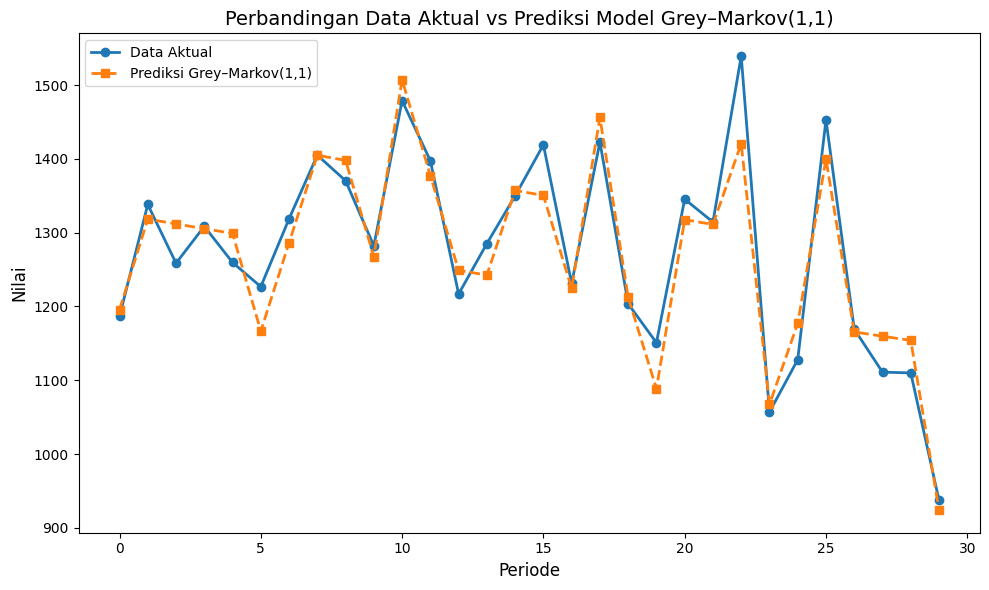

In [ ]:
import matplotlib.pyplot as plt

# Pastikan hanya data yang valid (tidak NaN)
data_valid = tabel_akhir.dropna(subset=["Data Asli", "Grey-Markov(1,1)"])

# Buat grafik time series
plt.figure(figsize=(10, 6))
plt.plot(data_valid.index, data_valid["Data Asli"], label="Data Aktual", marker='o', linestyle='-', linewidth=2)
plt.plot(data_valid.index, data_valid["Grey-Markov(1,1)"], label="Prediksi Grey–Markov(1,1)", marker='s', linestyle='--', linewidth=2)

# Tambahkan judul dan label
plt.title("Perbandingan Data Aktual vs Prediksi Model Grey–Markov(1,1)", fontsize=14)
plt.xlabel("Periode", fontsize=12)
plt.ylabel("Nilai", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# **References**

https://www.researchgate.net/publication/319605877_Application_of_Renewal_Gray_GM_11_Model_to_Prediction_of_Landslide_Deformation

http://iieta.org/sites/default/files/Journals/MMEP/02.1_05.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6112867/